# Supplementary Figure I in Appendix S1: 
# Cooperative coding in homogeneous EI-networks

In [1]:
import brian2 as b2
import json 
import numpy as np
import matplotlib.pyplot as plt 
 
from brian2 import BrianLogger
BrianLogger.log_level_warn() 
BrianLogger.suppress_name('resolution_conflict') # suppress warnings about variables that exist in Brian network and global namespace

from methods import Network, load_parameters

## E-only network with fixed within-population coupling strength 
The parameters for the excitatory-only networks shown in Fig I of S1 are stored in parameters/supp_... 

For fast resimulation, we recommend again to decrease network size and simulation time. See below an exemplary resimulation of the excitatory network tuned for RF size 11 (Fig Id):

Creating adjacency matrix with fixed indegree... 

100%|██████████| 41/41 [00:09<00:00,  4.22it/s]


--> stored in settings/adjacency_fixed_indegree/
Constructing network...
Equilibrate...
[                                        ----------------------------------------
self.nRF_target=11: mean_rate_center=0, mean_rate_edge=0 Hz
Stimulus on...
[                                        ----------------------------------------
self.nRF_target=11: mean_rate_center=203, mean_rate_edge=0 Hz
Indegrees (mean, SD): self.Kee=(np.float64(600.0), np.float64(0.0)), self.Kei=(0, 0), self.Kie=(0, 0), self.Kii=(0, 0).
Postprocessing: 
Extracting spike trains, keeping 10 neurons per feature population...


100%|██████████| 41/41 [00:00<00:00, 12714.71it/s]


Simulated RF size: 11.45


100%|██████████| 410/410 [00:01<00:00, 237.35it/s]


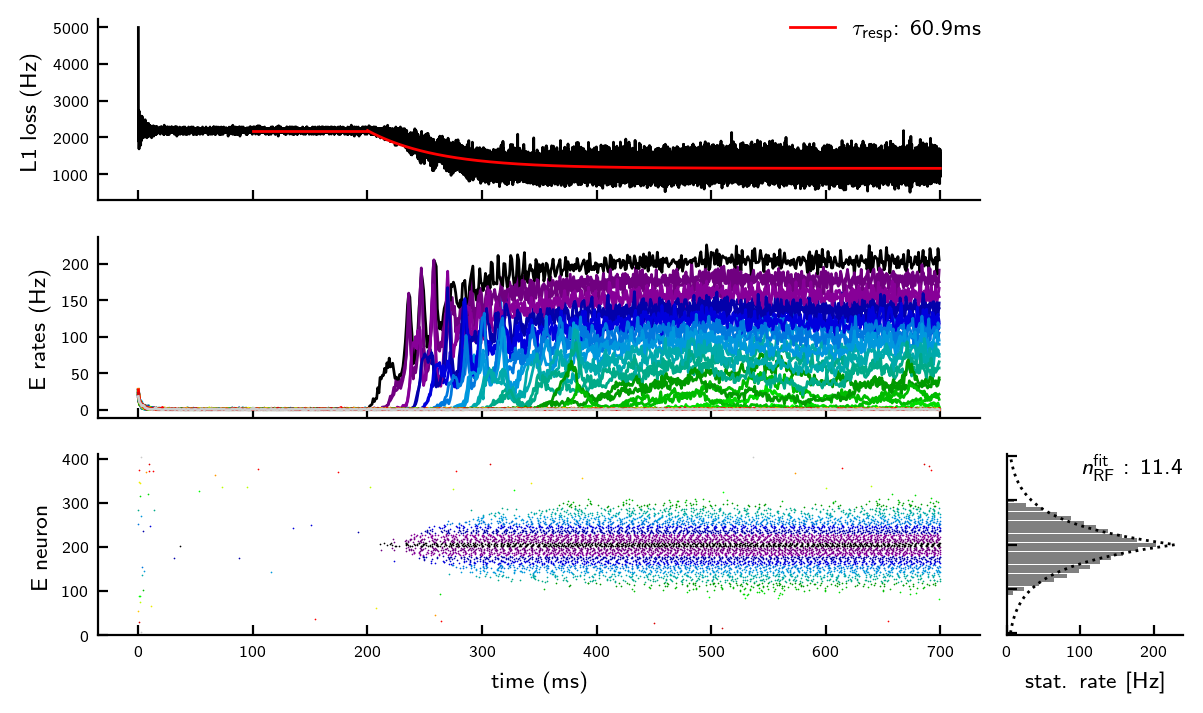

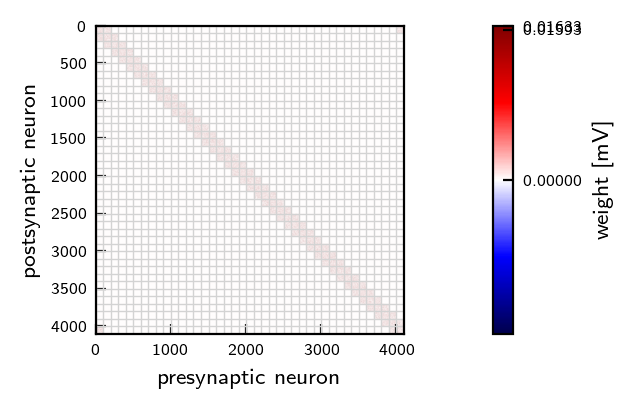

In [2]:
params_default_file = 'supp_E_nRF-11' # numerically optimized parameters 
params_adjust = {'Ne': 2000} # reduce population size to decrease simulation time  
net = Network(params_default_file = params_default_file, params_adjust = params_adjust) # initialize network
net.simulate(Tinit = 200, Tsim = 500, n_intv=1, print_schedule=False) # create network and simulate 
net.postproc(offset=300) 
net.plot_sim() # plot simulation
W, fig, ax = net.plot_connectivity(ne=100, ni=25) # plot weight matrix 

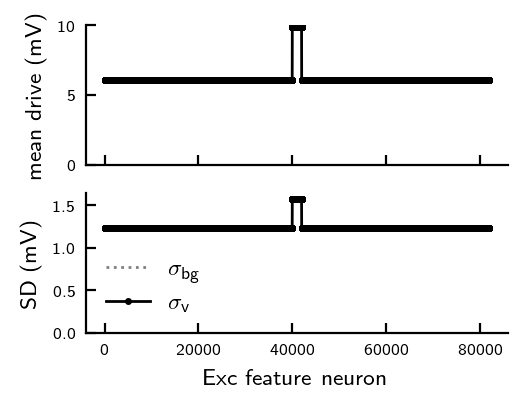

In [3]:
fig, ax = net.plot_stimulation(); # with input_mode == 'gaussian_white_noise', the noise level rises with the mean drive (~sqrt) 

## EI network with fixed within-population coupling strengths

Load stored adjacency matrix with fixed indegree.
Constructing network...
Equilibrate...
[                                        ----------------------------------------
self.nRF_target=11: mean_rate_center=1, mean_rate_edge=1 Hz
Stimulus on...
[                                        ----------------------------------------
self.nRF_target=11: mean_rate_center=179, mean_rate_edge=1 Hz
Indegrees (mean, SD): self.Kee=(np.float64(600.0), np.float64(0.0)), self.Kei=(np.float64(50.0), np.float64(0.0)), self.Kie=(np.float64(600.0), np.float64(0.0)), self.Kii=(np.float64(50.0), np.float64(0.0)).
Postprocessing: 
Extracting spike trains, keeping 10 neurons per feature population...


100%|██████████| 41/41 [00:00<00:00, 11755.98it/s]


Simulated RF size: 11.73


100%|██████████| 410/410 [00:00<00:00, 446.10it/s]


(<Figure size 1400x800 with 6 Axes>,
 array([[<Axes: ylabel='L1 loss (Hz)'>, <Axes: >],
        [<Axes: ylabel='E rates (Hz)'>, <Axes: >],
        [<Axes: ylabel='E neuron'>, <Axes: xlabel='stat. rate [Hz]'>],
        [<Axes: ylabel='I rates (Hz)'>, <Axes: >],
        [<Axes: xlabel='time (ms)', ylabel='I neuron'>, <Axes: >]],
       dtype=object))

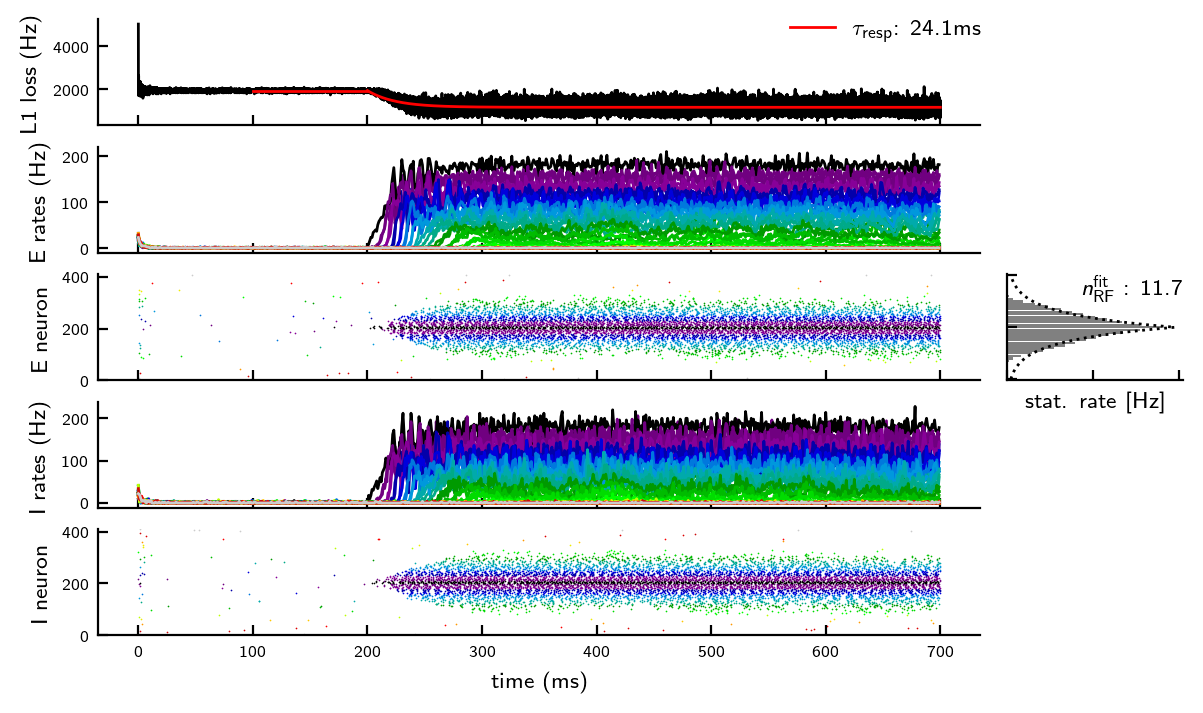

In [4]:
params_default_file = 'supp_EI_nRF-11' # numerically optimized parameters 
params_adjust = {'Ne': 2000} # reduce population size to decrease simulation time  
params_adjust['Ni'] = params_adjust['Ne'] // 4 # set inhibitory population size to 1/4 of excitatory population size
net = Network(params_default_file = params_default_file, params_adjust = params_adjust) # initialize network
net.simulate(Tinit = 200, Tsim = 500, n_intv=1, print_schedule=False) # create network and simulate 
net.postproc(offset=300) 
net.plot_sim() # plot simulation

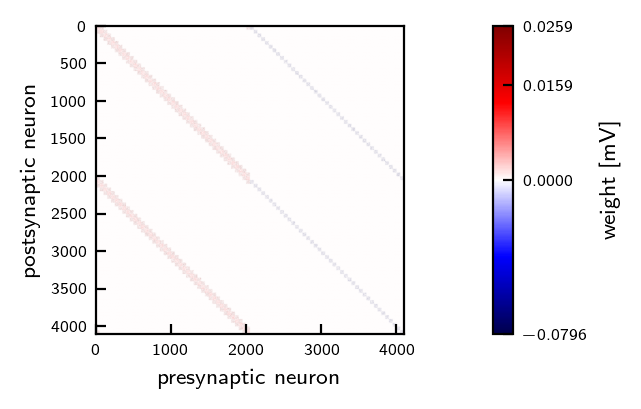

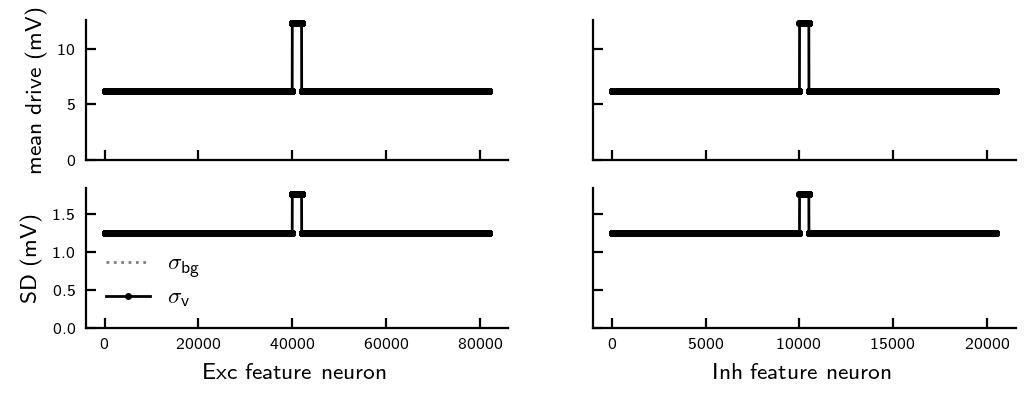

In [6]:
W, fig, ax = net.plot_connectivity(ne=50, ni=50, mark_feature_populations=False) # plot weight matrix 
fig, ax = net.plot_stimulation()

Note the difference to the networks in the main text: Here also the interneurons receive tuned feedforward input (the central feature population receives higher mean input, just like its excitatory partner population). Furthermore, interneurons are coupled within their own population (see weight matrix).